<a href="https://colab.research.google.com/github/twishi03/Data/blob/main/Squidpy_Graph_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%matplotlib inline

In [7]:
!pip install squidpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np

import squidpy as sq

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spatialdata/__init__.py:11: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [78]:
adata = sq.datasets.visium_fluo_adata()
adata

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [79]:
sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=6)

In [80]:
adata.obsp["spatial_connectivities"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

In [81]:
adata.obsp["spatial_distances"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

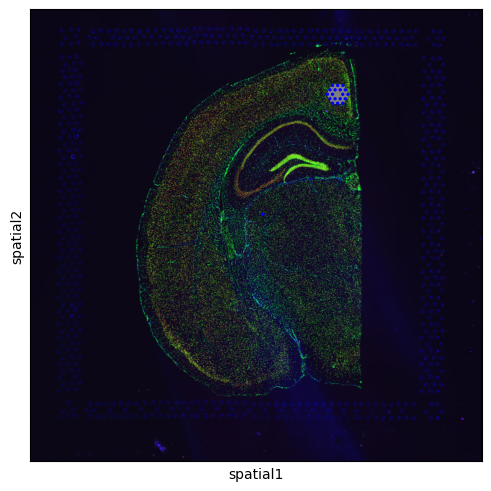

In [82]:
_, idx = adata.obsp["spatial_connectivities"][100, :].nonzero()
idx = np.append(idx, 90)
sq.pl.spatial_scatter(
    adata[idx, :],
    connectivity_key="spatial_connectivities",
    img=True,
    na_color="blue",
)

In [83]:
adata.obs

,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,leiden,cluster
AAACAAGTATCTCCCA-1,1,50,102,5295,8.574707,16067.0,9.684585,20.756831,26.738034,34.430821,47.986556,0.0,0.0,0.0,16067.0,12,Thalamus_2
AAACAGAGCGACTCCT-1,1,14,94,2855,7.957177,6265.0,8.742893,26.911413,32.928970,41.037510,55.770152,0.0,0.0,0.0,6265.0,4,Fiber_tracts
AAACAGTGTTCCTGGG-1,1,73,43,2173,7.684324,5327.0,8.580731,38.164070,44.997184,52.750141,65.778112,0.0,0.0,0.0,5327.0,1,Cortex_2
AAACATTTCCCGGATT-1,1,61,97,5393,8.593043,17053.0,9.744140,19.163783,25.508708,34.316543,48.824254,0.0,0.0,0.0,17053.0,9,Hypothalamus_2
AAACCGGGTAGGTACC-1,1,42,28,5242,8.564649,16147.0,9.689551,18.727937,24.431783,32.402304,46.522574,0.0,0.0,0.0,16147.0,5,Cortex_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTGTGCTAC-1,1,24,64,3372,8.123558,8671.0,9.067855,28.578019,34.794141,42.647907,56.314151,0.0,0.0,0.0,8671.0,2,Hippocampus
TTGTTGTGTGTCAAGA-1,1,31,77,3768,8.234565,9005.0,9.105646,20.755136,26.496391,34.169906,48.684064,0.0,0.0,0.0,9005.0,3,Thalamus_1
TTGTTTCACATCCAGG-1,1,58,42,4016,8.298291,10796.0,9.287024,22.860319,29.455354,38.291960,52.889959,0.0,0.0,0.0,10796.0,6,Cortex_4
TTGTTTCATTAGTCTA-1,1,60,30,3413,8.135640,8408.0,9.037058,23.786870,30.340152,38.808278,53.651284,0.0,0.0,0.0,8408.0,6,Cortex_4


In [84]:
adata = sq.datasets.imc()
adata

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


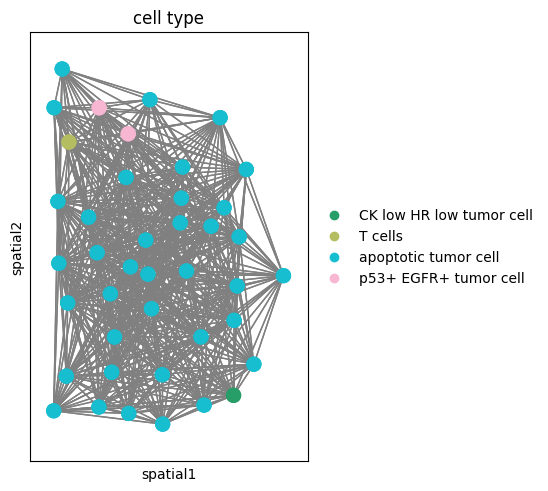

In [87]:
sq.gr.spatial_neighbors(adata, n_neighs=40, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][100, :].nonzero()
idx = np.append(idx, 100)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=400,
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


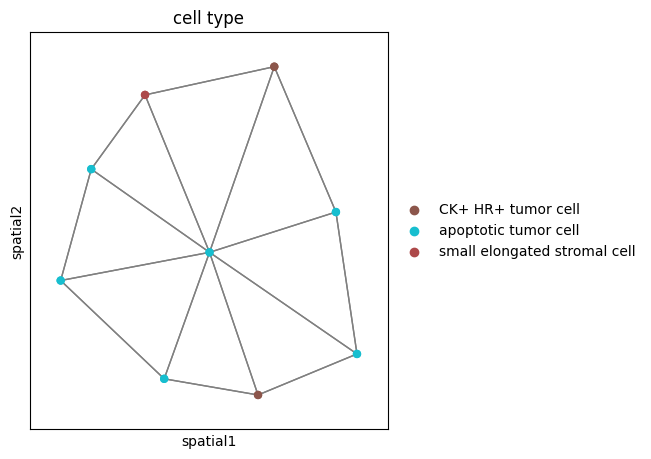

In [9]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=100,
)

In [10]:
sq.gr.spatial_neighbors(adata, radius=0.3, coord_type="generic")

adata.obsp["spatial_connectivities"]
adata.obsp["spatial_distances"]

<4668x4668 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>